<a href="https://colab.research.google.com/github/AlifeviousChristian/SVR-Project/blob/main/MLElectricityRoman_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To install the kaggle connnector

!pip install kaggle

In [2]:
# To allow the GDrive connection to this notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# This is to configure that our dataset will be saved at /content/drive/MyDrive/kaggle

import os
os.chdir("/content/drive/MyDrive/kaggle")

In [4]:
# This is to download the dataset from kagle url which is https://www.kaggle.com/datasets/stefancomanita/hourly-electricity-consumption-and-production

!kaggle datasets download -d stefancomanita/hourly-electricity-consumption-and-production

Dataset URL: https://www.kaggle.com/datasets/stefancomanita/hourly-electricity-consumption-and-production
License(s): CC0-1.0
hourly-electricity-consumption-and-production.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# This is to unzip the dataset

!unzip hourly-electricity-consumption-and-production.zip -d dataset

Archive:  hourly-electricity-consumption-and-production.zip
replace dataset/electricityConsumptionAndProductioction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/electricityConsumptionAndProductioction.csv  


In [179]:
# This is to import all necesary libraries

import tensorflow as tf
import os
import pandas as pd
import numpy as np

# membaca dataset dan mengubahnya menjadi dataframe
df = pd.read_csv("/content/drive/MyDrive/kaggle/dataset/electricityConsumptionAndProductioction.csv") #Based on the dataset information, all value is in MWs

# Calculate the number of rows to remove
df_reduced = df.iloc[5:55]

# Reset the index (optional)
df_reduced = df_reduced.reset_index(drop=True)

# Display the reduced DataFrame
df_reduced

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 05:00:00,5525,5385,1395,91,958,1455,1456,0,30
1,2019-01-01 06:00:00,5513,5349,1392,98,938,1451,1440,0,31
2,2019-01-01 07:00:00,5524,5547,1392,93,1187,1446,1394,0,34
3,2019-01-01 08:00:00,5510,5471,1391,51,1325,1357,1303,8,34
4,2019-01-01 09:00:00,5617,5545,1388,15,1398,1328,1319,61,34
5,2019-01-01 10:00:00,5643,5610,1390,-5,1410,1331,1324,126,34
6,2019-01-01 11:00:00,5737,5733,1390,-17,1400,1428,1320,182,34
7,2019-01-01 12:00:00,5776,5816,1390,-10,1416,1423,1357,206,34
8,2019-01-01 13:00:00,5744,5823,1389,15,1308,1412,1461,202,34
9,2019-01-01 14:00:00,5710,5721,1390,100,1245,1408,1383,160,33


In [189]:
import numpy as np
import pandas as pd

# memisahkan atribut dan tabel
X = df_reduced['DateTime']
y = df_reduced['Consumption']/1000 #setiap nilali consumption dibagi 1000 agar tidak terlalu besar nilainya

# Mengubah X menjadi bilangan bulat dimulai dari 0
X = np.arange(len(X))

# mengubah bentuk atribut (opsional, tergantung kebutuhan model Anda)
X = X.reshape(-1, 1)

# Create a Pandas DataFrame
data = {'X (DateTime_Numeric)': X.flatten(), 'y (Consumption)': y}  # Flatten X if it's a 2D array
table = pd.DataFrame(data)

# Display the table
display(table)

,X (DateTime_Numeric),y (Consumption)
0,0,5.525
1,1,5.513
2,2,5.524
3,3,5.510
4,4,5.617
5,5,5.643
6,6,5.737
7,7,5.776
8,8,5.744
9,9,5.710


In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [10, 100, 1000],
    'gamma': [0.8, 0.9, 1]
}
grid_search = GridSearchCV(model, parameters)

# melatih model dengan fungsi fit
grid_search.fit(X,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [10, 100, 1000], 'gamma': [0.8, 0.9, 1],
                         'kernel': ['rbf']})

In [197]:
# menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.8, 'kernel': 'rbf'}


In [198]:
# membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru  = SVR(C=10, gamma=0.8, kernel='rbf')
model_baru.fit(X,y)

SVR(C=10, gamma=0.8)

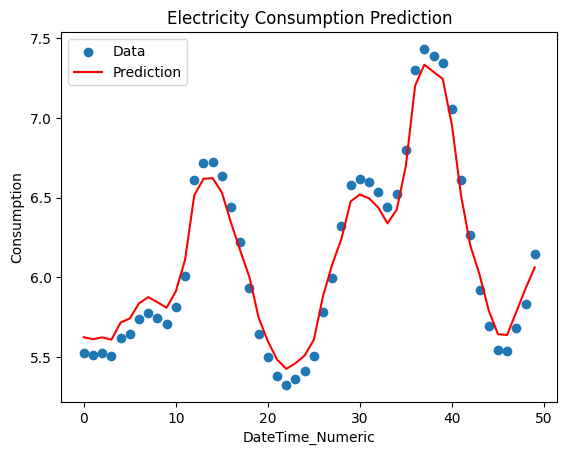

In [200]:
import matplotlib.pyplot as plt

# memvisiuaisasikan model
plt.scatter(X, y, label='Data')  # Label for the scatter plot
plt.plot(X, model_baru.predict(X), label='Prediction', color='red')  # Label and color for the line plot

# Add labels and title
plt.xlabel("DateTime_Numeric")  # Label for the x-axis
plt.ylabel("Consumption")  # Label for the y-axis
plt.title("Electricity Consumption Prediction")  # Title of the plot

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [201]:
import pandas as pd
import numpy as np

# Assuming X and y are already defined and model_baru is fitted

# Get predicted values
predictions = model_baru.predict(X)

# Calculate error
error = y - predictions

# Calculate percentage error
percentage_error = (error / y) * 100

# Create a Pandas DataFrame
data = {'y': y, 'Predicted': predictions, 'Error': error, 'Percentage Error': percentage_error}
table = pd.DataFrame(data)

# Calculate average error
average_error = table['Error'].mean()
print(f"Average Error: {average_error}")


# Display the table
display(table)

Average Error: -0.013326219002773173


,y,Predicted,Error,Percentage Error
0,5.525,5.624931,-0.099931,-1.808711
1,5.513,5.612595,-0.099595,-1.806554
2,5.524,5.624223,-0.100223,-1.814324
3,5.510,5.609611,-0.099611,-1.807820
4,5.617,5.716986,-0.099986,-1.780058
5,5.643,5.742645,-0.099645,-1.765815
6,5.737,5.837381,-0.100381,-1.749705
7,5.776,5.876020,-0.100020,-1.731649
8,5.744,5.844302,-0.100302,-1.746208
9,5.710,5.809653,-0.099653,-1.745232
